In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import census file and read it

In [2]:
df = pd.read_csv('census_18_2022 (1).csv') # import the file

In [3]:
df # read the file

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,"Retired Surveyor, building control",None,Christian
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8781,8781,1,Ferguson Villa,Lewis,Parkin-Webb,16,Grandson,NaN,Male,Student,None,NaN
8782,8782,1,Ferguson Villa,Adrian,Parkin-Webb,16,Grandson,NaN,Male,Student,None,NaN
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,NaN,Female,Student,None,NaN
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,NaN,Male,Student,None,NaN


In [4]:
df.info(); # see more about data features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8786 entries, 0 to 8785
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8786 non-null   int64 
 1   House Number                   8786 non-null   object
 2   Street                         8786 non-null   object
 3   First Name                     8786 non-null   object
 4   Surname                        8786 non-null   object
 5   Age                            8786 non-null   object
 6   Relationship to Head of House  8786 non-null   object
 7   Marital Status                 6646 non-null   object
 8   Gender                         8786 non-null   object
 9   Occupation                     8786 non-null   object
 10  Infirmity                      8786 non-null   object
 11  Religion                       6605 non-null   object
dtypes: int64(1), object(11)
memory usage: 823.8+ KB


# Data Cleaning begins !!!

In [5]:
df.isna().sum() # checking to see null cells

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2140
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2181
dtype: int64

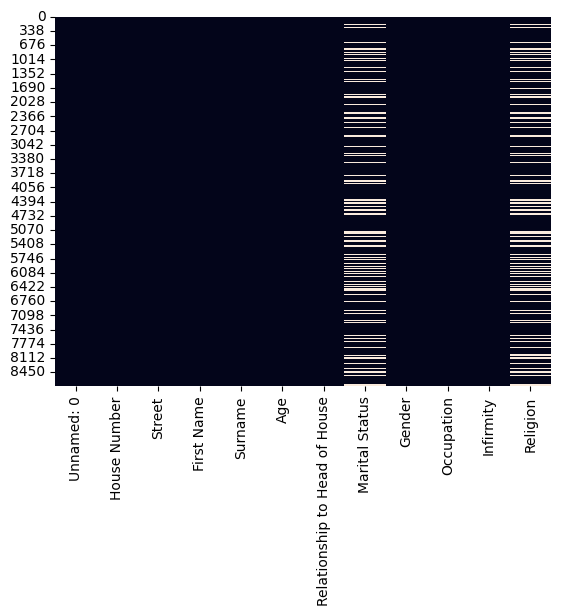

In [6]:
sns.heatmap(df.isnull(), cbar=False); # see null cells graphically

Using unique function to harmonise and further clean the variables

Clean and harmonize Marital Status variable column

In [7]:
df['Marital Status'].unique() # see each unique entries in the field 'Marital Status'

array(['Widowed', 'Single', nan, 'Divorced', 'Married', 'D', 'W', 'S',
       'M'], dtype=object)

In [8]:
# Harmonize all entries for each field to have either of Divorced, Widowed, Single, Married or Not applicable as the case
# may be

df.loc[df['Marital Status'] == 'D', 'Marital Status'] = 'Divorced' # Change D too Divorced
df.loc[df['Marital Status'] == 'W', 'Marital Status'] = 'Widowed'  # Change W to Widowed
df.loc[df['Marital Status'] == 'S', 'Marital Status'] = 'Single'   # Change S to Single
df.loc[df['Marital Status'] == 'M', 'Marital Status'] = 'Married'  # Change M to Married
df['Marital Status'].fillna('Not Applicable', inplace = True)      # Input Not Applicable for empty Cells since all marital status empty cell are below 18

In [9]:
# Check what has been done on the Marital Status Variable to see if its ok

df['Marital Status'].unique()

array(['Widowed', 'Single', 'Not Applicable', 'Divorced', 'Married'],
      dtype=object)

Clean and harmonize Religion variable column

In [10]:
df['Religion'].unique() # see each unique entries in the field 'Religion'

array(['Christian', 'None', nan, 'Methodist', 'Sikh', 'Muslim',
       'Catholic', 'Buddist', 'Jewish', 'Bahai', 'Pagan', 'Housekeeper',
       ' ', 'Sith', 'Nope'], dtype=object)

In [11]:
df['Religion'].value_counts()

None           2912
Christian      1953
Catholic        895
Methodist       613
Muslim          123
Jewish           48
Sikh             47
Bahai             3
Housekeeper       3
Buddist           2
Pagan             2
                  2
Sith              1
Nope              1
Name: Religion, dtype: int64

In [12]:
# Harmonize all entries for each field to a religion or Not applicable as the case
# may be

df['Religion'].fillna('None', inplace = True)                 # Input Not Applicable to all empty field
df['Religion'].mask(df['Religion'] == 'Nope', 'None', inplace = True)   # Change Nope to None as this is a mistake
df['Religion'].mask(df['Religion'] == 'Housekeeper', 'None', inplace = True)   # Change Nope to None as this is a mistake
df['Religion'].mask(df['Religion'] == ' ', 'None', inplace = True)      # Change the empty string to None
df['Religion'].mask(df['Religion'] == 'Sith', 'Sikh', inplace = True)   # Change Sith to Sikh as this appear to be a mistake

In [13]:
# Check what has been done on the religion Variable to see if its ok

df['Religion'].unique()

array(['Christian', 'None', 'Methodist', 'Sikh', 'Muslim', 'Catholic',
       'Buddist', 'Jewish', 'Bahai', 'Pagan'], dtype=object)

In [14]:
df['Religion'].value_counts()

None         5099
Christian    1953
Catholic      895
Methodist     613
Muslim        123
Sikh           48
Jewish         48
Bahai           3
Buddist         2
Pagan           2
Name: Religion, dtype: int64

Clean and harmonize Gender variable column

In [15]:
df['Gender'].unique() # see each unique entries in the field 'Gender'

array(['Male', 'Female', 'M', 'male', 'female', 'f', 'F', 'm'],
      dtype=object)

In [16]:
# Harmonize all entries for each field to have either of Male or Female

df['Gender'].mask(df['Gender'] == 'male', 'Male', inplace = True)      # Change male to Male
df['Gender'].mask(df['Gender'] == 'female', 'Female', inplace = True)  # Change female to Female
df['Gender'].mask(df['Gender'] == 'm', 'Male', inplace = True)         # Change m to Male
df['Gender'].mask(df['Gender'] == 'f', 'Female', inplace = True)       # Change f to Female
df['Gender'].mask(df['Gender'] == 'M', 'Male', inplace = True)         # Change M to Male
df['Gender'].mask(df['Gender'] == 'F', 'Female', inplace = True)       # Change F to Female

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Clean and harmonize Age variable column

In [18]:
df['Age'].unique() # see each unique entries in the field 'Age'

array(['79', '66', '19', '40', '38', '5', '74', '41', '88', '22', '64',
       '62', '59', '36', '2', '46', '61', '39', '21', '42', '54', '67',
       '84', '85', '34', '9', '53', '17', '43', '45', '44', '8', '4',
       '29', '47', '73', '18', '82', '86', '20', '33', '35', '71', '25',
       '23', '70', '68', '27', '48', '60', '0', '51', '56', '10', '50',
       '24', '37', '58', '13', '14', '28', '31', '52', '30', '1', '32',
       '11', '72', '55', '15', '16', '49', '57', '6', '75', '81', '26',
       '7', '3', '65', '87', '63', '93', '91', '69', '12', '77', '103',
       '105', '80', '83', '89', '76', '78', '100', ' ', '95', '94', '92',
       '67.59395344', '68.59395344', '74.52257249', '77.52257249',
       '71.70815374', '101', '97', '98', '90', '96', '64.43652627',
       '66.43652627', '104', 'forty', '84.64983653'], dtype=object)

In [19]:
df['Age'].replace(['forty'], 40, inplace = True)               # Change forty to 40

In [20]:
# filter out data with empty age if any exist and assign it to new variable

df_without_age = df[df['Age']==' ']

In [21]:
df_without_age

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1329,1329,56,Magpiepush Lane,Stephen,Holland,,Son,Single,Male,University Student,None,Christian
2080,2080,7,Goldfish Street,Toby,Tyler,,Husband,Married,Male,"Psychologist, sport and exercise",None,None


In [22]:
# filter our data with age and assign it to new variable

df_with_age = df[df['Age']!=' ']

In [23]:
df_with_age

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,"Retired Surveyor, building control",None,Christian
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8781,8781,1,Ferguson Villa,Lewis,Parkin-Webb,16,Grandson,Not Applicable,Male,Student,None,None
8782,8782,1,Ferguson Villa,Adrian,Parkin-Webb,16,Grandson,Not Applicable,Male,Student,None,None
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,Not Applicable,Female,Student,None,None
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,Not Applicable,Male,Student,None,None


In [24]:
#convert data with Age to type int

df_with_age['Age'].astype(str).astype(float)
df_with_age['Age'] = df_with_age['Age'].astype(float).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_23152\691465473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_age['Age'] = df_with_age['Age'].astype(float).astype(int)


In [25]:
# Find the mean of data with age

mean_age = int(df_with_age['Age'].mean())
print(mean_age)

35


In [26]:
# Replace data without age empty string with the mean age in the data distribution

df_without_age['Age'].replace([' '], mean_age, inplace = True)    # Change the empty string with the mean of the age

C:\Users\User\AppData\Local\Temp\ipykernel_23152\4263916071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_age['Age'].replace([' '], mean_age, inplace = True)    # Change the empty string with the mean of the age


In [27]:
# Add the data frame back together

df = pd.concat([df_with_age, df_without_age])   # Add the two dataframe together

In [28]:
# Check to see if there's no empty string again

df['Age'].unique()

array([ 79,  66,  19,  40,  38,   5,  74,  41,  88,  22,  64,  62,  59,
        36,   2,  46,  61,  39,  21,  42,  54,  67,  84,  85,  34,   9,
        53,  17,  43,  45,  44,   8,   4,  29,  47,  73,  18,  82,  86,
        20,  33,  35,  71,  25,  23,  70,  68,  27,  48,  60,   0,  51,
        56,  10,  50,  24,  37,  58,  13,  14,  28,  31,  52,  30,   1,
        32,  11,  72,  55,  15,  16,  49,  57,   6,  75,  81,  26,   7,
         3,  65,  87,  63,  93,  91,  69,  12,  77, 103, 105,  80,  83,
        89,  76,  78, 100,  95,  94,  92, 101,  97,  98,  90,  96, 104],
      dtype=int64)

Clean and harmonize Infirmity variable column

In [29]:
df['Infirmity'].unique()  # see all unique entries

array(['None', 'Physical Disability', ' ', 'Mental Disability', 'Blind',
       'Disabled', 'Deaf', 'Unknown Infection'], dtype=object)

In [30]:
df['Infirmity'].replace([' '], 'None', inplace = True)               # Change the empty string to None

Clean and harmonize Occupation variable column

In [31]:
# Check the Occupation variable count

df['Occupation'].value_counts()  

Student                                   1699
Unemployed                                 562
University Student                         559
Child                                      543
PhD Student                                 21
                                          ... 
Retired Civil engineer, contracting          1
Retired Textile designer                     1
Retired Occupational hygienist               1
Retired Equality and diversity officer       1
Retired Engineer, communications             1
Name: Occupation, Length: 1067, dtype: int64

In [32]:
# There are so many retirees, Group them all as retiree

df.loc[df['Occupation'].str.contains('retire', case=False), 'Occupation'] = 'Retiree'

In [33]:
df[df['Occupation']== ' ']  #check the empty string in occupation

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5925,5925,36,Bentley Street,Stephanie,James,21,Daughter,Single,Female,,None,None


In [34]:
# looking at it in context, she is a university student because age bracket and the street she lives

df.loc[df['Occupation'] == ' ', 'Occupation'] = 'University Student' # change her occupation to university student

Clean and harmonize Relationship to head of house variable column

In [35]:
# Check the feature of the 'Relationship to Head of House' variable to see anomalies

df['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Son', 'Wife', 'Husband', 'None', 'Daughter',
       'Cousin', 'Grandson', 'Lodger', 'Granddaughter', 'Sibling',
       'Step-Son', 'Step-Daughter', 'Visitor', 'Adopted Daughter',
       'Adopted Son', 'Neice', 'Son-in-law', 'Nephew',
       'Adopted Granddaughter'], dtype=object)

Clean and harmonize Surname variable column

In [36]:
# Check the feature of the 'Surname' variable to see anomalies

df['Surname'].unique()

array(['Kaur', 'Hughes', 'Freeman', 'Ward', 'Thorpe', 'Gill', 'Barber',
       'Henderson', 'Cook', "O'Brien", 'Law', 'Hardy', 'Rogers', 'Murphy',
       'Baldwin', 'Lawrence', "O'Neill", 'Turner', 'Preston', 'Haynes',
       'Brown', 'Smith', 'Wood', 'Campbell', 'Ahmed', 'Jones', 'Kay',
       'Hutchinson', 'Edwards', 'Evans', 'Murray', 'Berry',
       'Berry-Jackson', 'Bishop', 'Clark', 'McCarthy', 'Ali',
       'Richardson', 'Jackson', 'Roberts', 'Pearce', 'Kent', 'Higgins',
       'Nash', 'Harris', 'Butcher', 'Norris', 'Walsh', 'Holmes',
       'Griffiths', 'Allen', 'Carpenter', 'Blake', 'Francis', 'Payne',
       'Parker', 'George', 'Brooks', 'Donnelly', 'Walker', 'Cooper',
       'Woods', 'Russell', 'Stevenson', 'Slater', 'Todd', 'White',
       'Akhtar', 'Pope', 'Skinner', 'Singh', 'Robinson', 'King',
       'Pearson', 'Parry', 'Johnson', 'Davis', 'Davies', 'Buckley',
       'Davidson', 'Hancock-Davidson', 'Baker', 'James-Hutchinson',
       'Fisher', 'Sims', 'Clayton', 'Garner'

In [37]:
df['Surname'].value_counts()

Smith              232
Jones              224
Davies             135
Taylor             134
Williams           129
                  ... 
Burke-Johnston       1
Lowe-Cunningham      1
Conway               1
Swift-Kaur           1
Bennett-Turner       1
Name: Surname, Length: 672, dtype: int64

In [38]:
# Because its so large, Check for empty string in surname variable

df[df['Surname']== ' '] 

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Clean and harmonize First Name variable column

In [39]:
# Check the feature of the 'First Name' variable to see anomalies

df['First Name'].unique()

array(['Darren', 'Dean', 'Andrew', 'Sally', 'Brandon', 'Glenn', 'Lesley',
       'Damien', 'Marie', 'Melanie', 'Carl', 'Melissa', 'Jessica',
       'Sandra', 'Shaun', 'Marilyn', 'Philip', 'Katy', 'Francesca',
       'Stewart', 'Stanley', 'Glen', 'Kyle', 'Andrea', 'Denis', 'Claire',
       'Bruce', 'Abigail', 'Francis', 'Mandy', 'Annette', 'Timothy',
       'Emily', 'Owen', 'Janet', 'Leigh', 'Wendy', 'Karen', 'Graeme',
       'Reece', 'Wayne', 'Connor', 'Megan', 'Craig', 'Nicole', 'Aimee',
       'Frank', 'Jasmine', 'Linda', 'Brian', 'Josephine', 'Joel', 'Paul',
       'Kate', 'Molly', 'Karl', 'Kerry', 'Duncan', 'Mathew', 'Alan',
       'Bernard', 'Douglas', 'Rita', 'Rosie', 'Kieran', 'Eric',
       'Christopher', 'Zoe', 'Dominic', 'Gillian', 'Donna', 'Albert',
       'Victoria', 'Jason', 'Sara', 'Benjamin', 'Katherine', 'Michelle',
       'Joanna', 'Beth', 'Jacob', 'Rachel', 'Gareth', 'Joseph', 'June',
       'Lynda', 'Bethan', 'Gerald', 'Ashley', 'Joanne', 'Alexander',
       'Margare

In [40]:
df['First Name'].value_counts()

Joyce        42
Jill         39
Donna        36
Kyle         36
Chloe        35
             ..
Beverley     13
Anna         13
Frank        12
Leslie       12
Clare Ann     1
Name: First Name, Length: 365, dtype: int64

In [41]:
# Because its so large, Check for empty string in First Name variable

df[df['First Name']== ' '] 

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Clean and harmonize Street variable column

In [42]:
# Check the feature of the 'Street' variable to see anomalies

df['Street'].unique()

array(['Inverness Mission', 'Gold Road', 'Whitehall Street', 'Allen Ford',
       'Druid Prairie', 'Racoon Road', 'Reid Club', 'Minster Creek',
       'York Lane', 'Wakefieldbait Avenue', 'Wales Center',
       'Wright Forest', 'Belle Lane', 'Whitehalllink Avenue',
       'Evans Lane', 'Magpiepush Lane', 'Daisy Gateway', 'Polaris Avenue',
       'Gwent Avenue', 'Quinn Road', 'Hughes Street', 'St.Matthew Lane',
       'Yates Shoal', 'Goldfish Street', 'Foxglove Avenue',
       'Goldfish Divide', 'Orchard Road', 'Hearthawk Street',
       'Goldfishpick Avenue', 'Mason Loaf', 'Jones Junction',
       'Cancer Ramp', 'Hunt Lock', 'Glasgow Drive', 'Harvey Village',
       'Prince Avenue', 'Breakfast Road', 'Barry Avenue', 'Hove Lane',
       'Alberthook Lane', 'Tamarisk Prairie', 'Wright Cove',
       'Strawberrydike Street', 'June Road', 'Hardy Grove',
       'Albion Drive', 'Scotland Lane', 'Thomas Drive', 'Hussain Loaf',
       'Akhtar Drive', 'Bibi Coves', 'Watts Lane', 'Spencer Point',


In [43]:
df['Street'].value_counts()

Mason Loaf           707
Glorious Lane        619
Leonard Drive        484
Magpiepush Lane      406
Watts Lane           343
                    ... 
Ball Stables           5
Lisbon Spire           5
The Bastion            3
Oyster Lighthouse      2
Black Lodge            1
Name: Street, Length: 105, dtype: int64

In [44]:
# Because its so large, Check for empty string in Street variable

df[df['Street']== ' ']

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Clean and harmonize House Number variable column

In [45]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [46]:
df['House Number'].replace(['One'], '1', inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786 entries, 0 to 2080
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8786 non-null   int64 
 1   House Number                   8786 non-null   object
 2   Street                         8786 non-null   object
 3   First Name                     8786 non-null   object
 4   Surname                        8786 non-null   object
 5   Age                            8786 non-null   int64 
 6   Relationship to Head of House  8786 non-null   object
 7   Marital Status                 8786 non-null   object
 8   Gender                         8786 non-null   object
 9   Occupation                     8786 non-null   object
 10  Infirmity                      8786 non-null   object
 11  Religion                       8786 non-null   object
dtypes: int64(2), object(10)
memory usage: 892.3+ KB


In [48]:
#change variable to the right data type

df['House Number'] = df['House Number'].astype(float).astype(int) # House Number to Int
#df['Street'] = df['Street'].astype('string')                      # Street to String
#df['First Name'] = df['First Name'].astype('string')              # First Name to String
#df['Surname'] = df['Surname'].astype('string')                    # Surname to String
df['Age'] = df['Age'].astype(float).astype(int)                    # Age to Int
#df['Occupation'] = df['Occupation'].astype('string')              # Occupation to String
#df['Marital Status'] = df['Marital Status'].astype('category')    # Martial status to Category
#df['Gender'] = df['Gender'].astype('category')                    # Gender to Category
#df['Infirmity'] = df['Infirmity'].astype('category')              # Infirmity to Category
#df['Religion'] = df['Religion'].astype('category')                # Religion to Category
#df['Relationship to Head of House'] = df['Relationship to Head of House'].astype('string')   # Change to string

In [49]:
df.info() #Checking after the conversion to the right Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786 entries, 0 to 2080
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8786 non-null   int64 
 1   House Number                   8786 non-null   int32 
 2   Street                         8786 non-null   object
 3   First Name                     8786 non-null   object
 4   Surname                        8786 non-null   object
 5   Age                            8786 non-null   int32 
 6   Relationship to Head of House  8786 non-null   object
 7   Marital Status                 8786 non-null   object
 8   Gender                         8786 non-null   object
 9   Occupation                     8786 non-null   object
 10  Infirmity                      8786 non-null   object
 11  Religion                       8786 non-null   object
dtypes: int32(2), int64(1), object(9)
memory usage: 823.7+ KB


# Check for outliers using visualization

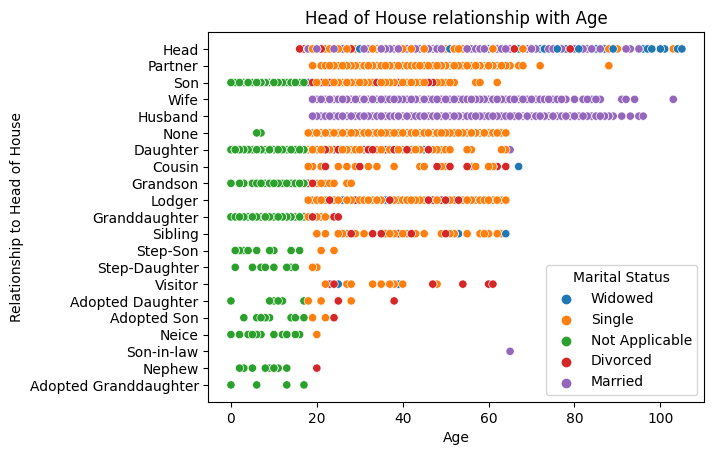

In [50]:
# Check for outlier using age against the relationship with the head of house

sns.scatterplot(x=df['Age'], y=df['Relationship to Head of House'], hue=df['Marital Status']).set(title='Head of House relationship with Age');

In [51]:
# From the graph above we can see that some head of house are below 20
# Check all head of house that are below 20

df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
904,904,3,Wales Center,Declan,Allen,17,Head,Divorced,Male,Unemployed,None,None
2503,2503,26,Mason Loaf,Harriet,Holt,16,Head,Divorced,Female,Student,None,None


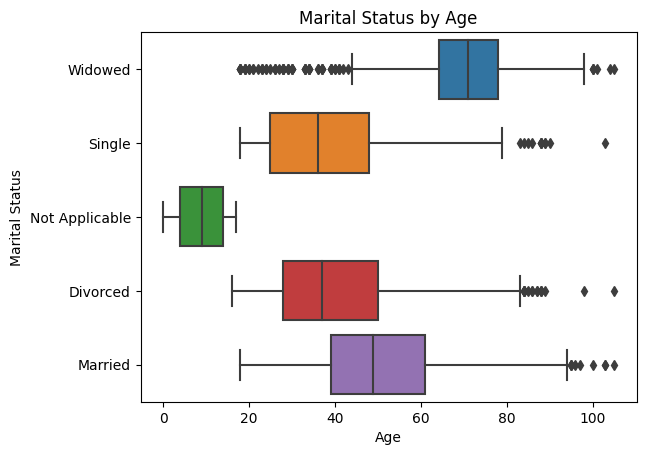

In [52]:
# Check for outlier using age against their Marital status

sns.boxplot(x=df['Age'], y=df['Marital Status']).set(title='Marital Status by Age');

In [109]:
#Infer numerical details from the figure above 

df[['Marital Status', 'Age']].groupby('Marital Status').describe()

Age                                                      
                 count       mean        std   min    25%   50%   75%    max
Marital Status                                                              
Divorced         758.0  40.473615  16.663781  18.0  28.00  37.0  50.0  105.0
Married         2484.0  50.324477  15.859869  18.0  39.00  49.0  61.0  105.0
Not Applicable  2138.0   8.892423   5.161829   0.0   4.00   9.0  14.0   17.0
Single          3036.0  37.456522  14.013376  18.0  25.00  36.0  48.0  103.0
Widowed          362.0  65.433702  19.433451  18.0  64.25  71.0  78.0  105.0

In [54]:
# How can we have data on populations who are divorce and below marriageable age?

df[(df['Marital Status'] == 'Divorced') & (df['Age'] < 18)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
904,904,3,Wales Center,Declan,Allen,17,Head,Divorced,Male,Unemployed,None,None
2503,2503,26,Mason Loaf,Harriet,Holt,16,Head,Divorced,Female,Student,None,None


Checking household the data above belong to

In [55]:
df[(df['House Number'] == 3) & (df['Street'] == 'Wales Center')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
904,904,3,Wales Center,Declan,Allen,17,Head,Divorced,Male,Unemployed,None,None
905,905,3,Wales Center,Jennifer,Allen,0,Daughter,Not Applicable,Female,Child,None,None


In [56]:
df[(df['House Number'] == 26) & (df['Street'] == 'Mason Loaf')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2503,2503,26,Mason Loaf,Harriet,Holt,16,Head,Divorced,Female,Student,None,None
2504,2504,26,Mason Loaf,Shane,Holt,0,Son,Not Applicable,Male,Child,None,None
2505,2505,26,Mason Loaf,Adam,Stevens,44,Lodger,Single,Male,"Pharmacist, hospital",None,Christian
2506,2506,26,Mason Loaf,Hazel,Evans,20,Lodger,Single,Female,University Student,None,None
2507,2507,26,Mason Loaf,Eleanor,Hudson,56,Lodger,Single,Female,Research scientist (maths),None,Christian
2508,2508,26,Mason Loaf,Peter,Osborne,36,Lodger,Single,Male,Phytotherapist,None,None


In [57]:
# Drop the inconsistent data above

df.drop([904, 905, 2503, 2504, 2505, 2506, 2507, 2508], inplace=True)

# Checking outliers to see if we need to drop more rows

 Checking outliers for Divorced

In [58]:
df[(df['Marital Status'] == 'Divorced') & (df['Age'] > 80)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8,8,7,Inverness Mission,Marie,Henderson,88,Head,Divorced,Female,Retiree,None,None
812,812,33,Wakefieldbait Avenue,Carly,Parkin,88,Head,Divorced,Female,Retiree,None,Christian
913,913,10,Wales Center,Christine,Smith,89,Head,Divorced,Female,Retiree,None,Methodist
1100,1100,11,Whitehalllink Avenue,Catherine,Harrison,87,Head,Divorced,Female,Retiree,None,Christian
1153,1153,22,Evans Lane,Jessica,Pollard,84,Head,Divorced,Female,Retiree,None,Christian
1154,1154,23,Evans Lane,Joyce,Hussain,84,Head,Divorced,Female,Retiree,None,Christian
1167,1167,32,Evans Lane,Katie,Smith,84,Head,Divorced,Female,Retiree,None,Christian
1220,1220,8,Magpiepush Lane,Lynda,Richardson,83,Head,Divorced,Female,Retiree,None,Christian
1320,1320,53,Magpiepush Lane,Donna,Wright,86,Head,Divorced,Female,Retiree,None,None
1369,1369,72,Magpiepush Lane,Colin,Dawson,81,Head,Divorced,Male,Retiree,None,Christian


 Checking outliers for Married

In [59]:
df[(df['Marital Status'] == 'Married') & (df['Age'] > 90)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
328,328,2,Allen Ford,Frederick,Taylor,93,Head,Married,Male,Retiree,None,Christian
329,329,2,Allen Ford,Lynda,Taylor,91,Wife,Married,Female,Retiree,None,Christian
627,627,33,Minster Creek,Mitchell,Powell,105,Head,Married,Male,Retiree,None,Jewish
628,628,33,Minster Creek,Debra,Powell,103,Wife,Married,Female,Retiree,None,Jewish
1223,1223,11,Magpiepush Lane,Ben,Williams,100,Head,Married,Male,Unemployed,None,Christian
1224,1224,11,Magpiepush Lane,Teresa,Williams,103,Wife,Married,Female,Retiree,None,Christian
1628,1628,17,Daisy Gateway,Ronald,Ali,95,Head,Married,Male,Retiree,None,None
1629,1629,17,Daisy Gateway,Carly,Ali,94,Wife,Married,Female,Retiree,None,None
2075,2075,5,Goldfish Street,Shannon,Whitehead,92,Head,Married,Female,Retiree,None,Muslim
2076,2076,5,Goldfish Street,Liam,Whitehead,95,Husband,Married,Male,Retiree,None,Muslim


Checking outliers for Single

In [60]:
df[(df['Marital Status'] == 'Single') & (df['Age'] > 80)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
542,542,13,Racoon Road,Damien,Sharp,103,Head,Single,Male,Retiree,None,Christian
4147,4147,45,Wright Cove,Yvonne,Parkes,88,Head,Single,Female,Retiree,None,Christian
4148,4148,45,Wright Cove,Anthony,Barber,88,Partner,Single,Male,Retiree,None,Christian
4566,4566,6,Thomas Drive,Albert,Evans,89,Head,Single,Male,Retiree,None,Christian
4796,4796,61,Watts Lane,William,Carter,88,Head,Single,Male,Retiree,None,Christian
4866,4866,104,Watts Lane,Kerry,Bray,89,Head,Single,Female,Retiree,None,Christian
4940,4940,158,Watts Lane,Callum,Gardiner,90,Head,Single,Male,Unemployed,None,Christian
5518,5518,5,Wells Summit,Alexander,Hewitt,83,Head,Single,Male,Retiree,None,Christian
5670,5670,1,Laurel Tunnel,Josh,Yates,84,Head,Single,Male,Retiree,None,Methodist
7158,7158,23,Skinner Ferry,Glenn,Fletcher,85,Head,Single,Male,Retiree,None,Christian


Checking outliers in the Occupation Variable

In [61]:
unemployed_df = df[df['Occupation'] == 'Unemployed']

In [62]:
unemployed_df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
16,16,13,Inverness Mission,Philip,Murphy,66,Head,Married,Male,Unemployed,None,None
18,18,14,Inverness Mission,Francesca,Baldwin,39,Head,Married,Female,Unemployed,None,Methodist
27,27,19,Inverness Mission,Abigail,Smith,34,Head,Divorced,Female,Unemployed,None,None
35,35,23,Inverness Mission,Leigh,Jones,44,Husband,Married,Male,Unemployed,None,Catholic
59,59,1,Gold Road,Reece,Higgins,82,Head,Married,Male,Unemployed,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8747,8747,1,Oyster Lighthouse,Dean,Connor,55,Head,Married,Male,Unemployed,None,None
8749,8749,1,Hughes Chalet,Jennifer,Bird,35,Head,Single,Female,Unemployed,None,Christian
8759,8759,1,Jenkins Cottage,Kerry,Jones,55,Cousin,Divorced,Female,Unemployed,None,Christian
8760,8760,1,Smith Lodge,Claire,Cooper,33,Head,Single,Female,Unemployed,None,Catholic


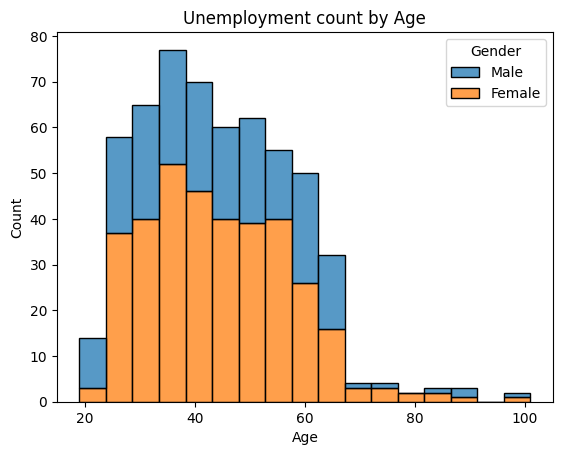

In [63]:
# See graph of unemployed population

sns.histplot(x=unemployed_df['Age'], hue=unemployed_df['Gender'], multiple="stack").set(title='Unemployment count by Age');

In [64]:
# Let see population size above 65 that are unemployed

df[(df['Age'] > 65) & (df['Occupation'] == 'Unemployed')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
16,16,13,Inverness Mission,Philip,Murphy,66,Head,Married,Male,Unemployed,None,None
59,59,1,Gold Road,Reece,Higgins,82,Head,Married,Male,Unemployed,None,Christian
446,446,25,Druid Prairie,Denise,Owens,67,Head,Married,Female,Unemployed,None,None
890,890,55,Wakefieldbait Avenue,Abigail,Johnson,77,Head,Widowed,Female,Unemployed,None,Methodist
912,912,9,Wales Center,Gareth,Smith,66,Head,Widowed,Male,Unemployed,None,Christian
953,953,5,Belle Lane,Linda,Ryan-Kerr,68,Head,Widowed,Female,Unemployed,None,Methodist
1223,1223,11,Magpiepush Lane,Ben,Williams,100,Head,Married,Male,Unemployed,None,Christian
1568,1568,152,Magpiepush Lane,Rebecca,Turner,79,Head,Divorced,Female,Unemployed,None,Catholic
2055,2055,8,Yates Shoal,Leah,Mistry,75,Head,Widowed,Female,Unemployed,None,None
2101,2101,14,Goldfish Street,Diana,Edwards,66,Head,Divorced,Female,Unemployed,None,None


In [65]:
# Population size above 65 that are unemployed can be classed as retiree

df.loc[(df['Age'] > 65) & (df['Occupation'] == 'Unemployed'), 'Occupation'] = 'Retiree'

In [66]:
# Create a new variable called 'Age Group' from the Age variable 

df.loc[df['Age'].between(0,4), 'Age Group'] = '0-4'
df.loc[df['Age'].between(5,9), 'Age Group'] = '5-9'
df.loc[df['Age'].between(10,14), 'Age Group'] = '10-14'
df.loc[df['Age'].between(15,19), 'Age Group'] = '15-19'
df.loc[df['Age'].between(20,24), 'Age Group'] = '20-24'
df.loc[df['Age'].between(25,29), 'Age Group'] = '25-29'
df.loc[df['Age'].between(30,34), 'Age Group'] = '30-34'
df.loc[df['Age'].between(35,39), 'Age Group'] = '35-39'
df.loc[df['Age'].between(40,44), 'Age Group'] = '40-44'
df.loc[df['Age'].between(45,49), 'Age Group'] = '45-49'
df.loc[df['Age'].between(50,54), 'Age Group'] = '50-54'
df.loc[df['Age'].between(55,59), 'Age Group'] = '55-59'
df.loc[df['Age'].between(60,64), 'Age Group'] = '60-64'
df.loc[df['Age'].between(65,69), 'Age Group'] = '65-69'
df.loc[df['Age'].between(70,74), 'Age Group'] = '70-74'
df.loc[df['Age'].between(75,79), 'Age Group'] = '75-79'
df.loc[df['Age'].between(80,84), 'Age Group'] = '80-84'
df.loc[df['Age'].between(85,89), 'Age Group'] = '85-89'
df.loc[df['Age'].between(90,94), 'Age Group'] = '90-94'
df.loc[df['Age']>95, 'Age Group'] = '95+'

In [67]:
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,Retiree,None,Christian,75-79
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian,65-69
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None,15-19
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian,40-44
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,Not Applicable,Female,Student,None,None,10-14
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,Not Applicable,Male,Student,None,None,10-14
8785,8785,1,Ferguson Villa,Claire,Parkin-Webb,8,Granddaughter,Not Applicable,Female,Student,None,None,5-9
1329,1329,56,Magpiepush Lane,Stephen,Holland,35,Son,Single,Male,University Student,None,Christian,35-39


In [68]:
# Distribute the Data set Occupation status in Student(Child), Student, Employed, Retiree

df.loc[df['Occupation'].str.fullmatch('Child', case=False), 'Employment Category'] = 'Student(Child)'
df.loc[df['Occupation'].str.fullmatch('Student', case=False), 'Employment Category'] = 'Student'
df.loc[df['Occupation'].str.fullmatch('University Student', case=False), 'Employment Category'] = 'Student'
df.loc[df['Occupation'].str.fullmatch('PhD Student', case=False), 'Employment Category'] = 'Student'
df.loc[df['Occupation'].str.fullmatch('Unemployed', case=False), 'Employment Category'] = 'Unemployed'
df.loc[df['Occupation'].str.fullmatch('Retiree', case=False), 'Employment Category'] = 'Retiree'


In [69]:
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Category
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,Retiree,None,Christian,75-79,Retiree
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian,65-69,NaN
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None,15-19,Student
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian,40-44,NaN
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian,35-39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,Not Applicable,Female,Student,None,None,10-14,Student
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,Not Applicable,Male,Student,None,None,10-14,Student
8785,8785,1,Ferguson Villa,Claire,Parkin-Webb,8,Granddaughter,Not Applicable,Female,Student,None,None,5-9,Student
1329,1329,56,Magpiepush Lane,Stephen,Holland,35,Son,Single,Male,University Student,None,Christian,35-39,Student


In [70]:
df['Employment Category'] = df['Employment Category'].fillna('Employed')

In [71]:
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Category
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,Retiree,None,Christian,75-79,Retiree
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian,65-69,Employed
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None,15-19,Student
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian,40-44,Employed
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian,35-39,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,Not Applicable,Female,Student,None,None,10-14,Student
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,Not Applicable,Male,Student,None,None,10-14,Student
8785,8785,1,Ferguson Villa,Claire,Parkin-Webb,8,Granddaughter,Not Applicable,Female,Student,None,None,5-9,Student
1329,1329,56,Magpiepush Lane,Stephen,Holland,35,Son,Single,Male,University Student,None,Christian,35-39,Student


Create a new Column to see the number(population size) in a particular household

This is based on same house address and a relationship exist with the head of house.

In [72]:
# Create a new column to check if relationship exit with the head of house, if relatioship exist its 1 and 0 for otherwise

df['Relationship exit'] = df['Relationship to Head of House'].apply(lambda x: 0 if x == 'None' else 1)

In [73]:
df


,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Category,Relationship exit
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,Retiree,None,Christian,75-79,Retiree,1
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian,65-69,Employed,1
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None,15-19,Student,1
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian,40-44,Employed,1
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian,35-39,Employed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8783,1,Ferguson Villa,Caroline,Parkin-Webb,13,Adopted Granddaughter,Not Applicable,Female,Student,None,None,10-14,Student,1
8784,8784,1,Ferguson Villa,Justin,Parkin-Webb,10,Grandson,Not Applicable,Male,Student,None,None,10-14,Student,1
8785,8785,1,Ferguson Villa,Claire,Parkin-Webb,8,Granddaughter,Not Applicable,Female,Student,None,None,5-9,Student,1
1329,1329,56,Magpiepush Lane,Stephen,Holland,35,Son,Single,Male,University Student,None,Christian,35-39,Student,1


In [74]:
df.groupby(['House Number', 'Street', 'Relationship exit'])['House Number'].count().values

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
new_df = df.groupby(['House Number', 'Street', 'Relationship exit'], as_index=False).count()

In [76]:
new_df

,House Number,Street,Relationship exit,Unnamed: 0,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Category
0,1,Akhtar Cove,1,2,2,2,2,2,2,2,2,2,2,2,2
1,1,Akhtar Drive,0,1,1,1,1,1,1,1,1,1,1,1,1
2,1,Akhtar Drive,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,Alberthook Lane,1,2,2,2,2,2,2,2,2,2,2,2,2
4,1,Albion Drive,1,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,228,Watts Lane,1,3,3,3,3,3,3,3,3,3,3,3,3
3287,229,Watts Lane,1,1,1,1,1,1,1,1,1,1,1,1,1
3288,230,Watts Lane,1,1,1,1,1,1,1,1,1,1,1,1,1
3289,231,Watts Lane,0,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:
new_df['occupacy count'] = new_df['Age']  #

In [78]:
df = df.merge(new_df[['occupacy count', 'House Number', 'Street', 'Relationship exit' ]], on=['House Number', 'Street', 'Relationship exit'], how='left')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8778 entries, 0 to 8777
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8778 non-null   int64 
 1   House Number                   8778 non-null   int32 
 2   Street                         8778 non-null   object
 3   First Name                     8778 non-null   object
 4   Surname                        8778 non-null   object
 5   Age                            8778 non-null   int32 
 6   Relationship to Head of House  8778 non-null   object
 7   Marital Status                 8778 non-null   object
 8   Gender                         8778 non-null   object
 9   Occupation                     8778 non-null   object
 10  Infirmity                      8778 non-null   object
 11  Religion                       8778 non-null   object
 12  Age Group                      8775 non-null   object
 13  Emp

In [80]:
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Category,Relationship exit,occupacy count
0,0,1,Inverness Mission,Darren,Kaur,79,Head,Widowed,Male,Retiree,None,Christian,75-79,Retiree,1,1
1,1,2,Inverness Mission,Dean,Hughes,66,Head,Widowed,Male,Financial trader,None,Christian,65-69,Employed,1,1
2,2,3,Inverness Mission,Andrew,Freeman,19,Head,Single,Male,University Student,None,None,15-19,Student,1,1
3,3,4,Inverness Mission,Sally,Ward,40,Head,Single,Female,Chief Marketing Officer,None,Christian,40-44,Employed,1,3
4,4,4,Inverness Mission,Brandon,Thorpe,38,Partner,Single,Male,Secondary school teacher,None,Christian,35-39,Employed,1,3


## Demographics

Age Distribution

In [81]:
Female = df[(df["Gender"] == "Female")]
Male = df[(df["Gender"] == "Male")]

AgeClass = ['95+','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [82]:
Male_age_count= Male['Age Group'].value_counts()
Male_age_count= list(-Male_age_count)
Male_age_count.reverse()

Female_age_count= Female['Age Group'].value_counts()
Female_age_count= list(Female_age_count)
Female_age_count.reverse()


In [83]:
new_table=pd.DataFrame({'Age_band': AgeClass, 'Male':Male_age_count, 'Female': Female_age_count})

Text(0.5, 1.0, 'Age Pyramid')

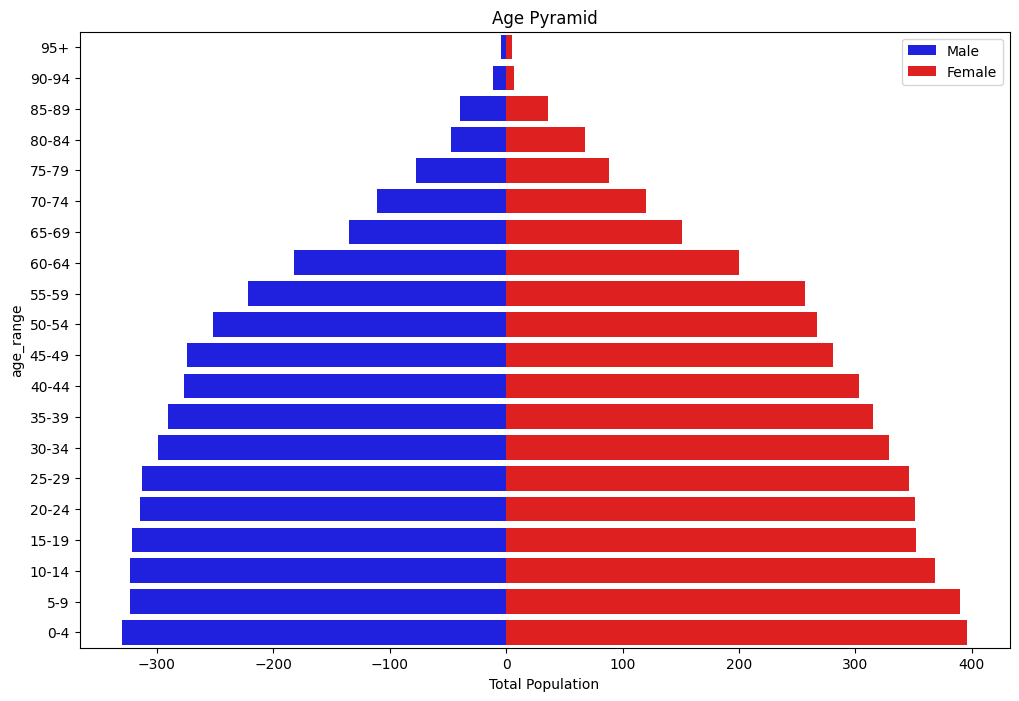

In [84]:
plt.figure(figsize=(12,8))
Age_pyramid=sns.barplot(x='Male',y='Age_band', data=new_table, color=('blue'), label='Male')
Age_pyramid=sns.barplot(x='Female',y='Age_band', data=new_table, color=('Red'), label='Female')
Age_pyramid.legend()
Age_pyramid.set(xlabel='Total Population', ylabel='age_range')
plt.title('Age Pyramid')

Birth Rate

In [85]:
#Calculating for birth rate

babies_age_zero = len(df[df['Age'] == 0])                    # New born babies
total_population_size = len(df)                              # Total population size
birth_rate = (babies_age_zero /total_population_size)*1000   # Birth Rate
print(birth_rate)

10.93643198906357


Emerging birth rate considering women that are within reproductive bracket

In [86]:
#women of childbearing age between 25 - 29 years
birth_age_2529 = len(df[df['Age'] == 0])
childbearing_age_2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
childbearing_age_2529 = len(df[childbearing_age_2529])

print((birth_age_2529/childbearing_age_2529)*1000)

291.7933130699088


In [87]:
# women of childbearing age between 30 - 34 years
birth_age_3034 = len(df[df['Age'] == 4])
childbearing_age_3034 = (df['Age'].between(30,34)) & (df['Gender'] == 'Female')
childbearing_age_3034= len(df[childbearing_age_3034])

print((birth_age_3034/childbearing_age_3034)*1000)

367.0520231213873


In [88]:
# women of childbearing age between 35 - 39 years
birth_age_3539 = len(df[df['Age'] == 8])
childbearing_age_3539 = (df['Age'].between(35,39)) & (df['Gender'] == 'Female')
childbearing_age_3539 = len(df[childbearing_age_3539])

print((birth_age_3539/childbearing_age_3539)*1000)

282.8282828282828


In [89]:
# women of childbearing age between 40 - 45 years
birth_age_4045 = len(df[df['Age'] == 12])
childbearing_age_4045 = (df['Age'].between(40,45)) & (df['Gender'] == 'Female')
childbearing_age_4045 = len(df[childbearing_age_4045])

print((birth_age_4045/childbearing_age_4045)*1000)

228.1449893390192


Death Rate

In [90]:
aging_group = df[df['Age'].between(65,106)].groupby('Age').size().sort_index(ascending=False)
aging_group

Age
105     3
104     1
103     3
101     1
100     4
98      2
97      2
96      2
95      3
94      1
93      2
92      2
91      3
90      1
89     12
88     13
87     22
86     13
85     16
84     27
83     25
82     17
81     22
80     24
79     32
78     31
77     39
76     26
75     37
74     43
73     47
72     54
71     51
70     36
69     50
68     48
67     52
66     61
65     75
dtype: int64

In [91]:
# shifting the ages up one to imitate the previous year's 'counts' per age

deduced_ages = aging_group.shift(-1)
deduced_ages

Age
105     1.0
104     3.0
103     1.0
101     4.0
100     2.0
98      2.0
97      2.0
96      3.0
95      1.0
94      2.0
93      2.0
92      3.0
91      1.0
90     12.0
89     13.0
88     22.0
87     13.0
86     16.0
85     27.0
84     25.0
83     17.0
82     22.0
81     24.0
80     32.0
79     31.0
78     39.0
77     26.0
76     37.0
75     43.0
74     47.0
73     54.0
72     51.0
71     36.0
70     50.0
69     48.0
68     52.0
67     61.0
66     75.0
65      NaN
dtype: float64

In [92]:
# calculate the difference between both two sets

diff = aging_group - deduced_ages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want to minus counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
1,104,-2.0
3,101,-3.0
7,96,-1.0
9,94,-1.0
11,92,-1.0
13,90,-11.0
14,89,-1.0
15,88,-9.0
17,86,-3.0
18,85,-11.0


In [94]:
#Claculating the death rate
death_rate = abs(((deaths['Count']).sum())/total_population_size)*1000
death_rate

15.379357484620641

Growth Rate

In [95]:
#Calculating Growth Rate
print(f"GR {birth_rate - death_rate}")
print(f"GR as Percentage {(birth_rate-death_rate)/10}%")

GR -4.442925495557072
GR as Percentage -0.4442925495557072%


Immigration Rate per 1000

In [96]:
#immigrants = number of lodgers + visitors
lodgers = len(df[(df['Relationship to Head of House'] == 'Lodger') & (df['Marital Status']=='Single')])
visitors = len(df[df['Relationship to Head of House'] == 'Visitor'])
immigrants = lodgers + visitors
immigrants
immigrants_by_1000 = immigrants/1000 * 100
immigrants_by_1000

25.1

Emmigration Rate per 1000

In [97]:
#emigrants (migration out) = divorced male
# To get emigrants, group by Marital Status and Gender
print("Groups in Marital Status by Gender:")
Emig_groups = df.groupby(["Marital Status","Gender"])
for group_key, group_value in Emig_groups:
    Emig_group = Emig_groups.get_group(group_key)
    #print("Count of each group:")
    Emig_grouped = df.groupby(["Marital Status", "Gender"]
                                     ).size().reset_index(name="Count")
print(Emig_grouped)

Groups in Marital Status by Gender:
   Marital Status  Gender  Count
0        Divorced  Female    492
1        Divorced    Male    266
2         Married  Female   1253
3         Married    Male   1231
4  Not Applicable  Female   1061
5  Not Applicable    Male   1077
6          Single  Female   1599
7          Single    Male   1437
8         Widowed  Female    226
9         Widowed    Male    136


In [99]:
#emmigrants is difference between female divorced and male divorced
emmigrants = 492 - 266
emmigrants
emmigrants_by_1000 = (emmigrants/total_population_size)*1000
print(f"emmigrant per 1000: {emmigrants_by_1000}")

emmigrant per 1000: 25.74618364092048


In [100]:
#Calculating population change
Population_Change = (immigrants_by_1000 + birth_rate ) - (emmigrants_by_1000 + death_rate)
Population_Change

-5.089109136477546

Unemployment Rate

In [101]:
unemployed_df = df[df['Employment Category'] == 'Unemployed']

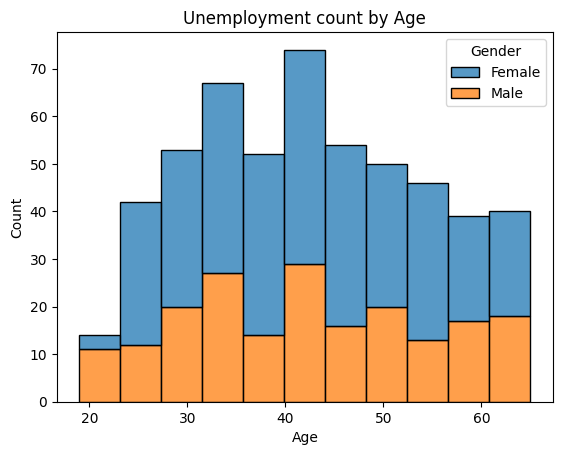

In [102]:
# See graph of employment category

sns.histplot(x=unemployed_df['Age'], hue=unemployed_df['Gender'], multiple="stack").set(title='Unemployment count by Age');

Employment Rate

In [105]:
employed_df = df[df['Employment Category'] == 'Employed']

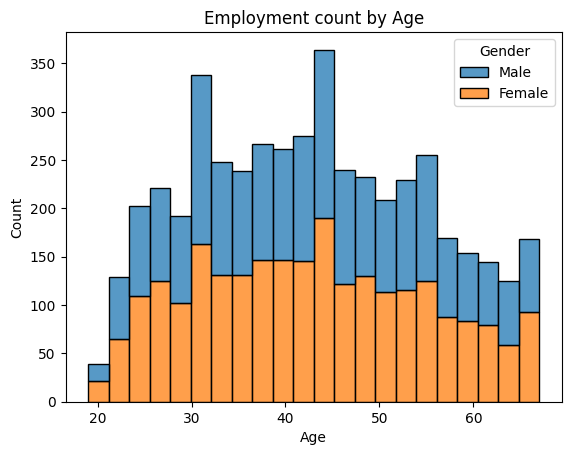

In [106]:
# See graph of employment category

sns.histplot(x=employed_df['Age'], hue=employed_df['Gender'], multiple="stack").set(title='Employment count by Age');

Percentage of population that is employed

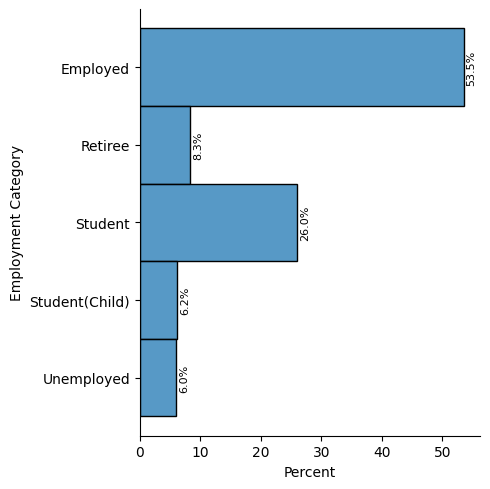

In [107]:
fg = sns.displot(df.sort_values(["Employment Category"]),y="Employment Category", stat="percent", );

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width() ) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
plt.show()


Percentage of population based on marital status

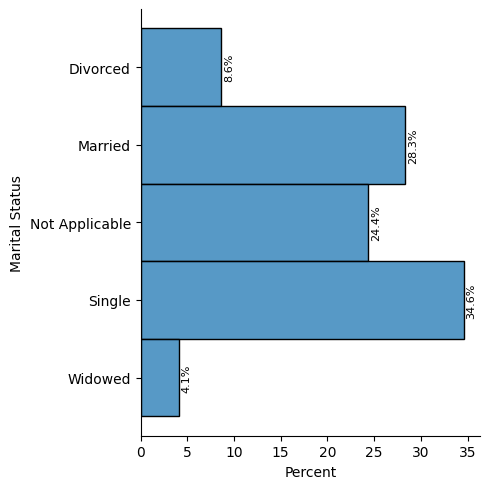

In [110]:
fg = sns.displot(df.sort_values(["Marital Status"]),y="Marital Status", stat="percent", );

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width() ) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
plt.show()

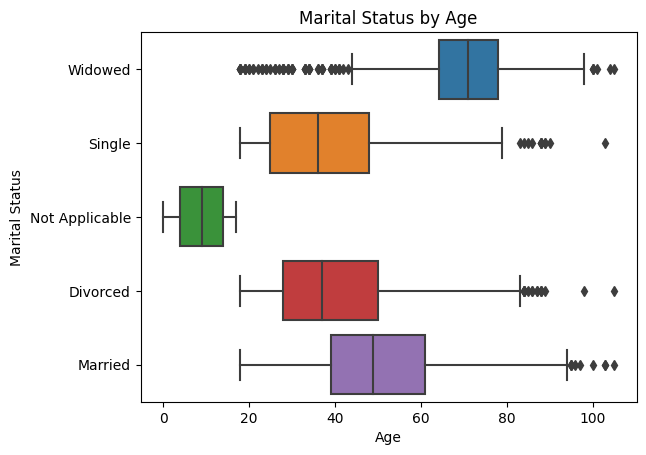

In [111]:
# Check for outlier using age against their Marital status

sns.boxplot(x=df['Age'], y=df['Marital Status']).set(title='Marital Status by Age');

In [112]:
#Infer numerical details from the figure above 

df[['Marital Status', 'Age']].groupby('Marital Status').describe()

Age                                                      
                 count       mean        std   min    25%   50%   75%    max
Marital Status                                                              
Divorced         758.0  40.473615  16.663781  18.0  28.00  37.0  50.0  105.0
Married         2484.0  50.324477  15.859869  18.0  39.00  49.0  61.0  105.0
Not Applicable  2138.0   8.892423   5.161829   0.0   4.00   9.0  14.0   17.0
Single          3036.0  37.456522  14.013376  18.0  25.00  36.0  48.0  103.0
Widowed          362.0  65.433702  19.433451  18.0  64.25  71.0  78.0  105.0

show infirmity variable percentage

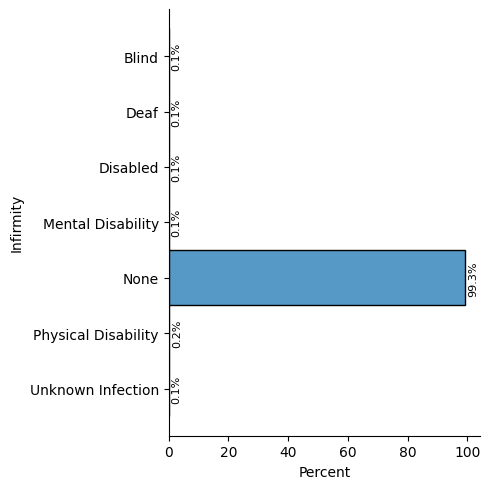

In [113]:
fg = sns.displot(df.sort_values(["Infirmity"]),y="Infirmity", stat="percent", );

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width() ) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
plt.show()

show religion with age to know percentage growth

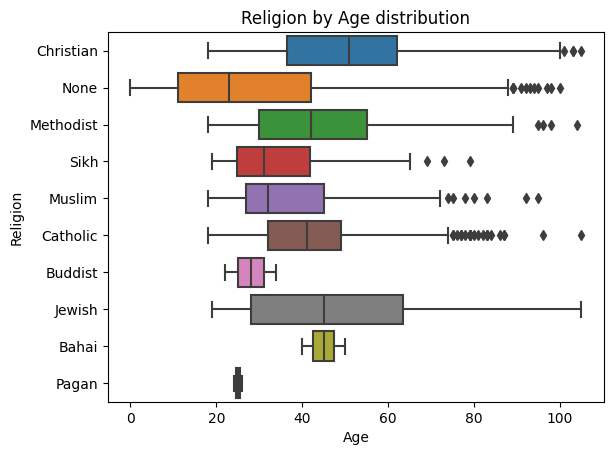

In [114]:
sns.boxplot(x=df['Age'], y=df['Religion']).set(title='Religion by Age distribution');

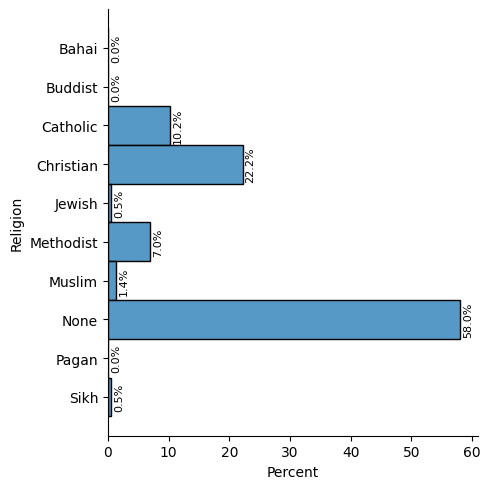

In [115]:
fg = sns.displot(df.sort_values(["Religion"]),y="Religion", stat="percent", );

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width() ) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
plt.show()

In [116]:
#Infer numerical details from the figure above 

df[['Religion', 'Age']].groupby('Religion').describe()

Age                                                       
            count       mean        std   min    25%   50%    75%    max
Religion                                                                
Bahai         3.0  45.000000   5.000000  40.0  42.50  45.0  47.50   50.0
Buddist       2.0  28.000000   8.485281  22.0  25.00  28.0  31.00   34.0
Catholic    895.0  41.874860  14.029052  18.0  32.00  41.0  49.00  105.0
Christian  1951.0  49.859559  18.126415  18.0  36.50  51.0  62.00  105.0
Jewish       48.0  47.770833  21.865390  19.0  28.00  45.0  63.50  105.0
Methodist   613.0  43.920065  16.856618  18.0  30.00  42.0  55.00  104.0
Muslim      123.0  38.162602  16.924797  18.0  27.00  32.0  45.00   95.0
None       5093.0  27.783821  20.716899   0.0  11.00  23.0  42.00  100.0
Pagan         2.0  25.000000   1.414214  24.0  24.50  25.0  25.50   26.0
Sikh         48.0  35.291667  15.089743  19.0  24.75  31.0  41.75   79.0

Assumed commuters

In [117]:
#Selecting employed commuters at random

commuters = df[df['Age'].between(18,65)]
commuters['Occupation'].unique()

array(['University Student', 'Chief Marketing Officer',
       'Secondary school teacher', 'Psychologist, clinical',
       'Engineer, site', 'Occupational therapist', 'Facilities manager',
       'Barista', 'Building control surveyor',
       'Manufacturing systems engineer', 'Unemployed',
       'Financial manager', 'Intelligence analyst', 'Quantity surveyor',
       'Advertising copywriter', 'Teacher, secondary school',
       'Government social research officer', 'Textile designer',
       'Air cabin crew', 'Building surveyor', 'Geologist, engineering',
       'Firefighter', 'Chemist, analytical', 'Teacher, music',
       'Arts development officer', 'Student', 'Herbalist',
       'Designer, exhibition/display', 'Therapist, nutritional',
       'Solicitor', 'Designer, interior/spatial',
       'Chartered public finance accountant', 'Air traffic controller',
       'Soil scientist', 'Administrator', 'Designer, textile',
       'Multimedia specialist', 'Clinical cytogeneticist',
     

In [118]:
#Randomly selected number of assumed commuters

assumed_commuters = len(df[df['Occupation'].isin(['Engineer, energy', 'Psychiatrist', 'Unemployed',
       'Engineer, biomedical', 'Surveyor, building control',
       'Corporate treasurer', 'Student', 'Print production planner',
       'Multimedia specialist', 'Tax adviser', 'University Student',
       'Music therapist', 'Airline pilot', 'Retail banker',
       'General practice doctor', 'Hospital doctor',
       'Communications engineer', 'Sport and exercise psychologist',
       'Equities trader', 'Hydrographic surveyor',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Health physicist', 'Museum/gallery exhibitions officer',
       'Race relations officer', 'Secretary/administrator',
       'Pension scheme manager', 'Call centre manager',
       'Lecturer, higher education', 'Town planner', 'Prison officer',
       'Paramedic', 'Broadcast engineer',
       'Control and instrumentation engineer', 'Sports administrator',
       'Dramatherapist', 'Copywriter, advertising',
       'Administrator, charities/voluntary organisations',
       'Scientist, forensic', 'Chief Operating Officer',
       'Therapist, horticultural', 'Nature conservation officer',
       'Engineer, materials', 'Mechanical engineer', 'Dealer',
       'Environmental manager', 'Exercise physiologist',
       'Production designer, theatre/television/film',
       'Investment analyst', 'Animator', 'Risk manager',
       'Scientist, biomedical', 'Journalist, newspaper', 'Pathologist',
       'Patent attorney', 'Early years teacher', 'Engineer, maintenance',
       'Lighting technician, broadcasting/film/video', 'Gaffer',
       'Geologist, wellsite', 'Financial risk analyst',
       'Surveyor, minerals', 'Scientist, research (medical)',
       'Statistician', 'Naval architect', 'Psychologist, occupational',
       'Food technologist', 'Geneticist, molecular',
       'Child psychotherapist', 'Industrial buyer', 'Actuary',
       'Primary school teacher', 'Claims inspector/assessor',
       'Chiropodist', 'Educational psychologist',
       'Engineer, manufacturing', 'Designer, industrial/product',
       'Investment banker, operational',
       'Accountant, chartered certified', 'Dietitian', 'Music tutor',
       'Mudlogger', 'Lexicographer', 'Environmental consultant',
       'Advice worker', 'Education officer, environmental',
       'Doctor, general practice', 'Jewellery designer',
       'Exhibitions officer, museum/gallery', 'Manufacturing engineer',
       'Fitness centre manager', 'Amenity horticulturist',
       'Advertising copywriter', 'Translator',
       'Training and development officer', 'Administrator',
       'Psychologist, counselling', 'Chartered certified accountant',
       'Art gallery manager', 'Ceramics designer',
       'Scientist, water quality', 'Geophysicist/field seismologist',
       'Media planner', 'Engineer, production', 'Travel agency manager',
       'Therapist, art', 'Chemist, analytical', 'Publishing copy',
       'Set designer', 'Plant breeder/geneticist',
       'Therapist, occupational', 'Agricultural consultant',
       'Insurance underwriter', 'Drilling engineer', 'Tourism officer',
       'Field seismologist', 'Engineer, drilling'])])

print(F"Number of assumed commuters is {assumed_commuters}")

Number of assumed commuters is 3643


In [119]:
#Percentage of assumed commuters
total_population = len(df)
percenatage_assumed_commuters = assumed_commuters/total_population * 100
percenatage_assumed_commuters

41.50148097516519